<a href="https://colab.research.google.com/github/Gaurav2305/Acme-Co-Employee-Attrition-Analysis-and-Prediction/blob/main/Handwritten_Recognition_(OCR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'emnist:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7160%2F10705%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240417%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240417T072237Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd7c81fed6db0bd58c463a07b84097ae99d52567b6ff4ede4000d64bd29a9a2f46003e1f9cebb5eceacaaea5e736fd8048de4ef466153b3d1209655a7c906fcbfac016a18f2a86956e498566aba33336543f9aec5795312dc6944f03f52c46285bc15636eb7efdef10d2693cfee1455ebc0d25d1955bea3052eeeeb671917aaa615a925a445e0b6c0bde470e63efe809f0064445d2ab3bef1270abe6a1bb62e2541a7e576012872321fb128ec056b85ccdfaa881005ce853e2d64ad7213fceacd995a651feb6a376177f2bfabcfda9fb99a57255ac7177088ec34278bf1ee38aa69f88dcc278029645017680c17cc0aa1f2b08e6685d8e404691d910805f6ef4b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 1330183464 bytes downloaded
Downloaded and uncompressed: emnist
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-byclass-test-images-idx3-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-letters-test-images-idx3-ubyte
/kaggle/input/

# Dependencies / Dataset

In [3]:
import pandas as pd
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

num_columns = 785

# Create column names
columns = ['label'] + list(range(1, num_columns))

# Read the training and testing datasets
ds_train = pd.read_csv("/kaggle/input/emnist/emnist-balanced-train.csv", header=None)
ds_test = pd.read_csv("/kaggle/input/emnist/emnist-balanced-test.csv", header=None)

# Assign column names to the DataFrames
ds_train.columns = columns
ds_test.columns = columns

# Reset index
ds_train = ds_train.reset_index(drop=True)
ds_test = ds_test.reset_index(drop=True)

# Extract features and labels
x_train = ds_train.drop(['label'], axis=1)
y_train = ds_train['label']
x_test = ds_test.drop(['label'], axis=1)
y_test = ds_test['label']

# Display the first few rows of the DataFrame
print(ds_train.head())
print(ds_test.head())


   label  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
0     45  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     36  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2     43  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3     15  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

   782  783  784  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 785 columns]
   label  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
0     41  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     39  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      9  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3     26  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0 

# the 62 classes , mapped to actual values

In [5]:
alpha_num_to_char = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j',
    20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't',
    30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z',
    36: 'A', 37: 'B', 38: 'C', 39: 'D', 40: 'E', 41: 'F', 42: 'G', 43: 'H', 44: 'I', 45: 'J',
    46: 'K', 47: 'L', 48: 'M', 49: 'N', 50: 'O', 51: 'P', 52: 'Q', 53: 'R', 54: 'S', 55: 'T',
    56: 'U', 57: 'V', 58: 'W', 59: 'X', 60: 'Y', 61: 'Z'
}

show random Example :

In [6]:
def show_example(n) :
    label = alpha_num_to_char[ds_train.iloc[n,0]]  # the example's label
    plt.title(label)
    example = np.array(x_train.iloc[n]) # extract the 28 *28 array that contains the pixels
    example_image = example.reshape(28 , 28 ) # rearrange the array to be a 28 by 28 matrix ,that represents that actual image
    plt.imshow(example_image , cmap ='gray')
    plt.axis('off')

    plt.show()

In [7]:
def show_example_and_predicted_val(n,predicted_n) :

    true_val = alpha_num_to_char[ds_train.iloc[n,0]]  # the example's label
    predicted_val = alpha_num_to_char[predicted_n]  # the example's label

    plt.title("Actual val : "+ true_val+"\n Predicted :" + predicted_val)
    example = np.array(x_train.iloc[n]) # extract the 28 *28 array that contains the pixels
    example_image = example.reshape(28 , 28 ) # rearrange the array to be a 28 by 28 matrix ,that represents that actual image
    plt.imshow(example_image , cmap ='gray')
    plt.axis('off')

    plt.show()

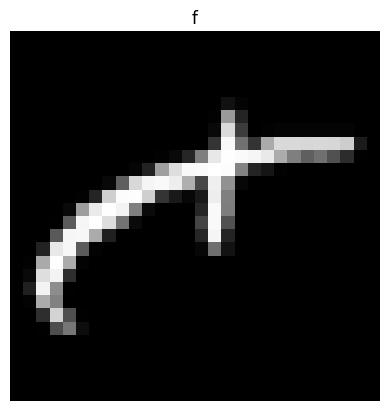

In [8]:
show_example(3)


# preprocessing using a pipeline

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class Reshaper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_reshaped = X.reshape(-1, 28, 28, 1)
        return X_reshaped

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('reshaper', Reshaper())  # Step 2: Custom Reshaper
])


# Fit and transform the training data

x_train_processed = pipeline.fit_transform(x_train)
y_train_processed = np.eye(62)[y_train.astype(int)]

x_test_processed = pipeline.transform(x_test)

y_test_processed = np.eye(62)[y_test.astype(int)]

In [10]:
print('input shape',x_train_processed.shape)
print('output shape',y_train.shape)
# y_train = np.eye(62)[y_train.astype(int)]
print('output shape',y_train_processed.shape)


input shape (112800, 28, 28, 1)
output shape (112800,)
output shape (112800, 62)


the CNN , since we have only 1 channel (grayscaled images ) we can implement our model as a sequential model (explain whats sequentiel)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

#  multiple model architectures
models = []
input_shape=(28,28,1)
# Model 1
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(62, activation='softmax'))
models.append(model1)

# Model 2
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(Dropout(0.25))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(62, activation='softmax'))
# Add layers for Model 2
models.append(model2)

# Model 3
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model3.add(Dropout(0.25))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(62, activation='softmax'))
models.append(model3)

# Train each model
for i, model in enumerate(models):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train_processed, y_train_processed, epochs=5, batch_size=32)

# Evaluate each model
accuracies = []
for i, model in enumerate(models):
    loss, accuracy = model.evaluate(x_test_processed, y_test_processed)
    accuracies.append(accuracy)
    print(f"Model {i+1} Accuracy: {accuracy}")

# Select the best model based on accuracy
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]
print(f"Best Model: Model {best_model_index+1}")


Epoch 1/5
3525/3525 [==============================] - 90s 25ms/step - loss: 0.7944 - accuracy: 0.7599
Epoch 2/5
3525/3525 [==============================] - 86s 24ms/step - loss: 0.4846 - accuracy: 0.8385
Epoch 3/5
3525/3525 [==============================] - 84s 24ms/step - loss: 0.4194 - accuracy: 0.8575
Epoch 4/5
3525/3525 [==============================] - 90s 25ms/step - loss: 0.3734 - accuracy: 0.8696
Epoch 5/5
3525/3525 [==============================] - 87s 25ms/step - loss: 0.3410 - accuracy: 0.8787
Epoch 1/5
3525/3525 [==============================] - 119s 34ms/step - loss: 1.2284 - accuracy: 0.6341
Epoch 2/5
3525/3525 [==============================] - 119s 34ms/step - loss: 0.8262 - accuracy: 0.7371
Epoch 3/5
3525/3525 [==============================] - 117s 33ms/step - loss: 0.7410 - accuracy: 0.7622
Epoch 4/5
3525/3525 [==============================] - 120s 34ms/step - loss: 0.6870 - accuracy: 0.7776
Epoch 5/5
3525/3525 [==============================] - 117s 33ms/step

1/1 [==============================] - 0s 182ms/step


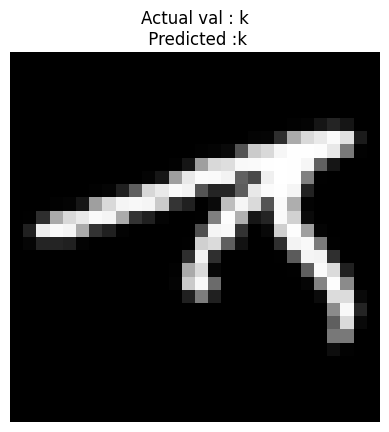

In [12]:
# some example from the data set
x=50
example0=np.argmax(best_model.predict(x_train_processed[x].reshape(1,28,28,1)).flatten())
alpha_num_to_char[example0]
show_example_and_predicted_val(x,example0)

Accuracy on the test data